In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=1000, n_features=2, n_targets=10, noise=3)



In [3]:
X

array([[-0.55561787, -0.0597833 ],
       [ 0.53910945, -0.82810401],
       [ 2.34943319,  0.48255591],
       ...,
       [-0.14236551,  0.97705964],
       [-0.74044411,  1.05711494],
       [ 0.98792108, -0.23220505]], shape=(1000, 2))

In [4]:
y

array([[-44.66740969, -27.80716153, -44.72830874, ..., -28.72635406,
        -45.04674362, -14.04347874],
       [-34.26274081,   6.37524076,  20.86737279, ..., -13.20709842,
        -12.12132447,   4.59640668],
       [218.54934381, 113.40663654, 204.97557359, ..., 101.37629296,
        205.80565737,  50.5465973 ],
       ...,
       [ 75.01280428,  12.44060727,  20.1699844 , ...,  33.5377043 ,
         48.94557924,   3.67227749],
       [ 41.26950582,  -2.58758994, -31.15212239, ...,  24.00241848,
         12.69423306, -12.69601755],
       [ 54.367895  ,  39.86027969,  73.57714757, ...,  25.72527798,
         67.82140843,  18.30008463]], shape=(1000, 10))

In [6]:
pd.DataFrame(X)[0]

0     -0.555618
1      0.539109
2      2.349433
3      0.127095
4      0.237259
         ...   
995   -1.762102
996   -0.150043
997   -0.142366
998   -0.740444
999    0.987921
Name: 0, Length: 1000, dtype: float64

In [12]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1000, 2)
y shape: (1000, 10)


<Axes: >

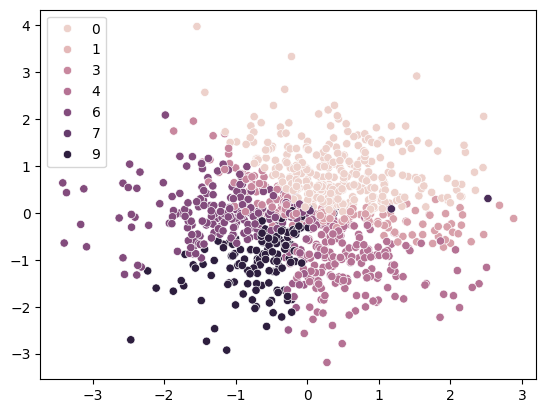

In [13]:
y = np.argmax(y, axis=1)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [15]:
X_train.shape,X_test.shape

((800, 2), (200, 2))

In [16]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')

In [17]:
svr.fit(X_train, y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [18]:
svr.coef_

array([[-1.51900003, -2.05882143]])

In [19]:
y_pred =svr.predict(X_test)

In [20]:
y_pred

array([ 2.17969615e+00,  2.68738664e-01,  1.50652331e+00,  3.44095106e+00,
        3.52474606e+00,  7.12651436e+00, -6.44690355e-01,  6.05872646e+00,
        4.14196712e+00,  3.10626079e+00,  1.90714513e+00,  5.04892430e+00,
        5.38853133e+00, -1.11475196e+00,  4.57840680e+00,  2.16656241e-01,
        3.22617061e+00,  3.97942224e+00,  6.24600163e+00,  3.16510843e-01,
        2.96457053e+00,  7.19811066e+00,  4.82650042e+00,  6.64839397e+00,
        7.78651076e+00,  5.46881515e+00,  5.00851857e+00,  1.96720356e+00,
        5.17010175e+00,  7.38448611e+00,  4.57389470e+00,  7.40762486e-01,
        6.20277667e+00,  6.15841774e+00,  6.20426026e+00,  6.96670757e-01,
        4.98386419e+00,  2.15777013e+00,  3.90758881e+00,  1.44037258e+00,
       -1.39579205e-01,  3.97453692e+00,  3.68378420e+00, -4.71786937e-01,
        1.60609802e+00,  4.02894192e+00,  6.14795133e+00,  4.69511040e+00,
        2.81920787e+00,  3.04440877e+00,  2.84101131e+00,  6.64563924e+00,
        3.78184593e+00,  

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6620482130249048

In [26]:
# Hyperparameter tuning with SVR
from sklearn.model_selection import GridSearchCV
params={'C':[1,2,3,10,50,100],
        'gamma':[1,0.1,0.2,0.001,0.003],
        'kernel':['linear'],
        'epsilon':[0.01,0.1,0.2,0.3]
        }
grid=GridSearchCV(SVR(),param_grid=params,cv=5,verbose=3)
grid

,estimator,SVR()
,param_grid,"{'C': [1, 2, ...], 'epsilon': [0.01, 0.1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [27]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.616 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.619 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.648 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.640 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.598 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.616 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.619 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.648 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.640 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.598 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.2, kern

,estimator,SVR()
,param_grid,"{'C': [1, 2, ...], 'epsilon': [0.01, 0.1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


In [28]:
grid.best_params_

{'C': 2, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [29]:
grid.best_score_

np.float64(0.625557019764201)

In [30]:
final_model=grid.best_estimator_

In [31]:
y_pred=final_model.predict(X_test)

In [32]:
r2_score(y_test, y_pred)

0.6619296847456928